# 1 IMPORTS

In [150]:
import pandas as pd
import numpy as np
import inflection
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.display import HTML
from IPython.display import Image


## 1.1 Helper Functions

In [170]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    
    sns.set()

In [171]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1.2 Loading data

In [2]:
#Two different files, store has the information about promotions, etc. 
#Sales reports the sales of each store day by day in a ~2 year interval

df_raw_store = pd.read_csv('../data/store.csv')
df_raw_sales = pd.read_csv('../data/train.csv')

df_raw = pd.merge(df_raw_store, df_raw_sales, how='left', on='Store')

/home/rafael/Downloads/portfolio/Sales-Prediction/.SalesPredictionEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2 DESCRICAO DOS DADOS

In [3]:
df2 = df_raw.copy()
df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


## 2.1 Rename Columns

In [4]:
#i will be using snakecase for this project, so might turn it a standard

cols = df2.columns
snakecase_function = lambda x: inflection.underscore( x )
cols_new = list( map(snakecase_function, cols) )
df2.columns = cols_new

df2

,store,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,"5,350.00",NaN,NaN,1,22.00,"2,012.00","Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


## 2.2 Data Dimensions

In [5]:
print(f'Number of lines: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[0]}')

Number of lines: 1017209
Number of columns: 1017209


## 2.3 Data Types

In [6]:
#need to fill NA before changing datatypes
df2.dtypes

store                             int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
dtype: object

In [7]:
#I am doing this here because i will need it for filling NA, otherwise it would be on change data types section
df2['date'] = pd.to_datetime( df2['date'] )

## 2.4 Check NA

In [8]:
df2.isna().sum()

store                                0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
dtype: int64

## 2.5 Fillout NA

In [9]:
df2.describe()

,store,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,day_of_week,sales,customers,open,promo,school_holiday
count,"1,017,209.00","1,014,567.00","693,861.00","693,861.00","1,017,209.00","509,178.00","509,178.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00"
mean,558.43,"5,430.09",7.22,"2,008.69",0.50,23.27,"2,011.75",4.00,"5,773.82",633.15,0.83,0.38,0.18
std,321.91,"7,715.32",3.21,5.99,0.50,14.10,1.66,2.00,"3,849.93",464.41,0.38,0.49,0.38
min,1.00,20.00,1.00,"1,900.00",0.00,1.00,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,710.00,4.00,"2,006.00",0.00,13.00,"2,011.00",2.00,"3,727.00",405.00,1.00,0.00,0.00
50%,558.00,"2,330.00",8.00,"2,010.00",1.00,22.00,"2,012.00",4.00,"5,744.00",609.00,1.00,0.00,0.00
75%,838.00,"6,890.00",10.00,"2,013.00",1.00,37.00,"2,013.00",6.00,"7,856.00",837.00,1.00,1.00,0.00
max,"1,115.00","75,860.00",12.00,"2,015.00",1.00,50.00,"2,015.00",7.00,"41,551.00","7,388.00",1.00,1.00,1.00


In [10]:
# competition_distance - set a distance 4 times bigger than the max value when there is no competition
df2['competition_distance'] = df2['competition_distance'].apply(lambda x: 300000 if np.isnan( x ) else x )

# competition_open_since_month - The idea to deal with those variables is 
# to say there are zero days since competition opened, I just set those to be equal to the date
df2['competition_open_since_month'] = df2.apply( lambda x: x['date'].month 
                                                if np.isnan(x['competition_open_since_month']) 
                                                else x['competition_open_since_month'], axis=1)

# competition_open_since_year

df2['competition_open_since_year'] = df2.apply( lambda x: x['date'].year 
                                               if np.isnan(x['competition_open_since_year']) 
                                               else x['competition_open_since_year'], axis=1)

# promo2_since_week

df2['promo2_since_week'] = df2.apply( lambda x: x['date'].week 
                                     if np.isnan(x['promo2_since_week']) 
                                     else x['promo2_since_week'], axis=1)

# promo2_since_year
df2['promo2_since_year'] = df2.apply( lambda x: x['date'].year 
                                     if np.isnan(x['promo2_since_year']) 
                                     else x['promo2_since_year'], axis=1)

# promo_interval - we can just set to 0 when there is no promo
df2['promo_interval'].fillna(0, inplace=True)

#now I need a feature that describes whether the store is in promo2 or not since those infos are in different files
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
month_map = {i+1: months[i] for i in range(12)}

df2['date_month'] = df2['date'].dt.month.map( month_map )

df2['is_promo2'] = df2[['date_month', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 
                                                               1 if x['date_month'] in x['promo_interval'].split(',') 
                                                               else 0, axis=1 )

## 2.6 Change Data Types

In [11]:
df2 = df2.astype( {'competition_open_since_month':'int64',
            'competition_open_since_year':'int64',
            'promo2_since_week':'int64',
            'promo2_since_year':'int64'} ) 
df2.dtypes

store                                    int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
date_month                              object
is_promo2                                int64
dtype: object

## 2.7 Descriptive Statistics

In [128]:
num_attributes = df2.select_dtypes(include=['float64','int64'])
cat_attributes = df2.select_dtypes(exclude=['float64','int64','datetime64[ns]'])

### 2.7.1 Numerical Atributes

In [129]:
#attributes to evaluate: mean, median, std, min, max, range, skew, kurtosis

d1 = np.mean(num_attributes)
d2 = pd.Series(np.median(num_attributes, axis=0), index=d1.index)
d3 = np.std(num_attributes)
d4 = np.min(num_attributes)
d5 = np.max(num_attributes)
d6 = d5-d4
d7 = pd.Series( skew(num_attributes), index= d1.index)
d8 = pd.Series( kurtosis(num_attributes), index= d1.index)

df_description = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8], axis=1)
df_description.columns = ['mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']

In [130]:
# quick statistical remark: skew means there is a tail to the right(positive) or the left(negative)
# kurtosis means it is sharper (>>0) or broader(<<0) than normal distribution

df_description

,mean,median,std,min,max,range,skew,kurtosis
store,558.43,558.00,321.91,1.00,"1,115.00","1,114.00",-0.00,-1.20
competition_distance,"6,195.17","2,330.00","16,856.98",20.00,"300,000.00","299,980.00",14.00,237.34
competition_open_since_month,6.79,7.00,3.31,1.00,12.00,11.00,-0.04,-1.23
competition_open_since_year,"2,010.32","2,012.00",5.52,"1,900.00","2,015.00",115.00,-7.24,124.07
promo2,0.50,1.00,0.50,0.00,1.00,1.00,-0.00,-2.00
promo2_since_week,23.62,22.00,14.31,1.00,52.00,51.00,0.18,-1.18
promo2_since_year,"2,012.79","2,013.00",1.66,"2,009.00","2,015.00",6.00,-0.78,-0.21
day_of_week,4.00,4.00,2.00,1.00,7.00,6.00,0.00,-1.25
sales,"5,773.82","5,744.00","3,849.92",0.00,"41,551.00","41,551.00",0.64,1.78
customers,633.15,609.00,464.41,0.00,"7,388.00","7,388.00",1.60,7.09


### 2.7.2 Categorical Atributes

In [140]:
cat_attributes.apply(lambda x: x.unique().shape[0], axis=0)

store_type         4
assortment         3
promo_interval     4
state_holiday      5
date_month        12
dtype: int64

In [165]:
df2[df2['state_holiday'] != '0'].head()

,store,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,date_month,is_promo2
57,1,c,a,"1,270.00",9,2008,0,23,2015,0,4,2015-06-04,0,0,0,1,a,0,Jun,0
67,1,c,a,"1,270.00",9,2008,0,22,2015,0,1,2015-05-25,0,0,0,0,a,0,May,0
78,1,c,a,"1,270.00",9,2008,0,20,2015,0,4,2015-05-14,0,0,0,0,a,0,May,0
91,1,c,a,"1,270.00",9,2008,0,18,2015,0,5,2015-05-01,0,0,0,1,a,0,May,0
116,1,c,a,"1,270.00",9,2008,0,15,2015,0,1,2015-04-06,0,0,0,0,b,1,Apr,0


<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

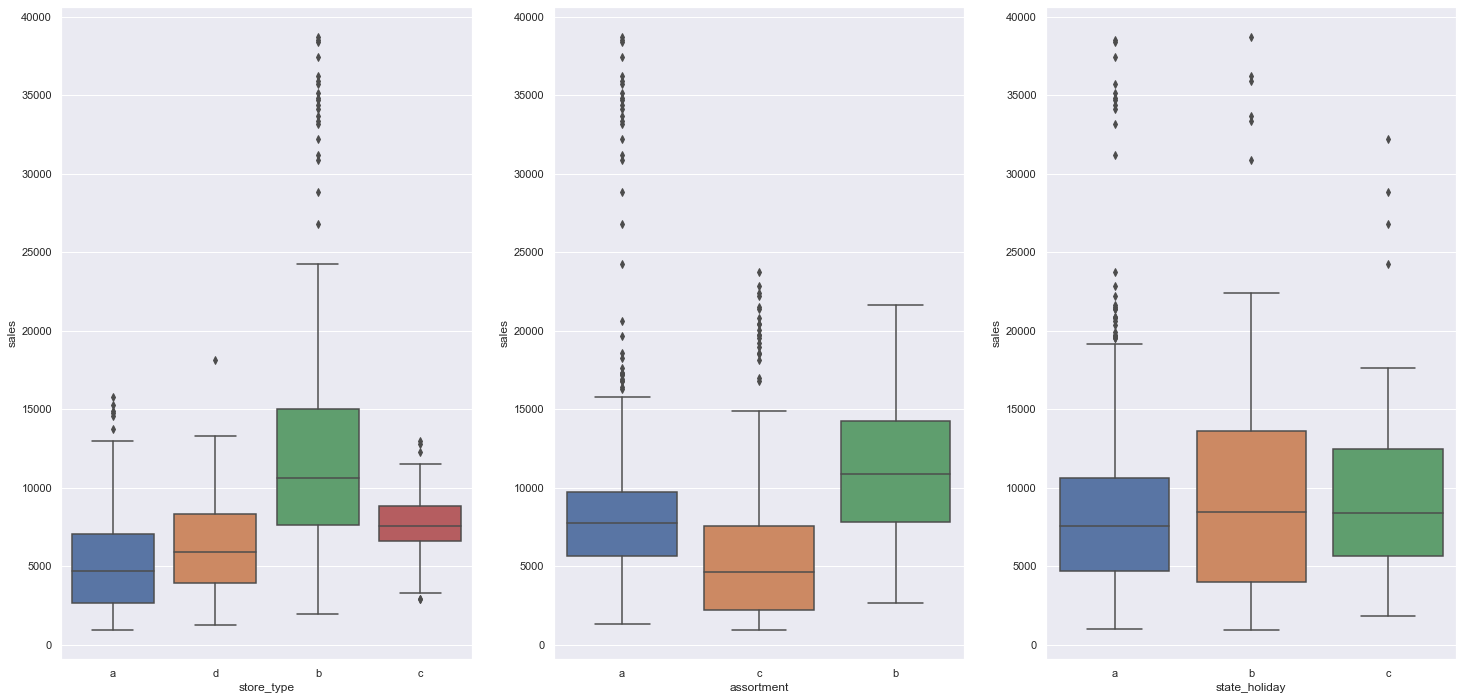

In [172]:
aux1 = df2[(df2['state_holiday'] != '0') & (df2['sales'] > 0) & (df2['state_holiday'] != 0)]

plt.subplot(1,3,1)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='assortment', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

# 3 FEATURE ENGINEERING

## 3.1 Mapa Mental de Hipoteses

## 3.2 Criacao das Hipoteses

## 3.3 Lista Final de Hipóteses

## 3.4 Feature Engineering

# 4 FILTRAGEM DE VARIÁVEIS

## 4.1 Filtragem das Linhas


## 4.2 Selecao das Colunas

# 5 ANALISE EXPLORATORIA DOS DADOS

## 5.1 Analise Univariada

### 5.1.1 Response Variable

### 5.1.2 Numerical Variable

### 5.1.3 Categorical Variable

## 5.2 Analise Bivariada

## 5.3 Analise Multivariada

### 5.3.1 Numerical Attributes

### 5.3.2 Categorical Attributes

# 6 DATA PREPARATION

## 6.1 Normalizacao

## 6.2 Rescaling

## 6.3 Transformacao

### 6.3.1 Encoding

### 6.3.2 Response Variable Transformation

### 6.3.3 Nature Transformation

# 7 FEATURE SELECTION

## 7.1 Split dataframe into training and test dataset

## 7.2 Boruta as Feature Selector

### 7.2.1 Best Features from Boruta

## 7.3 Manual Feature Selection

# 8 MACHINE LEARNING MODELLING

## 8.1 Average Model

## 8.2 Linear Regression Model

### 8.2.1 Linear Regression Model - Cross Validation

## 8.3 Linear Regression Regularized Model - Lasso

###  8.3.1 Lasso - Cross Validation

## 8.4 Random Forest Regressor

### 8.4.1 Random Forest Regressor - Cross Validation

## 8.5 XGBoost Regressor

### 8.5.1 XGBoost Regressor - Cross Validation

## 8.6 Compare Model's Performance

### 8.6.1 Single Performance

### 8.6.2 Real Performance - Cross Validation

# 9 HYPERPARAMETER FINE TUNING

## 9.1 Random Search

## 9.2 Final Model

# 10 TRADUCAO E INTERPRETACAO DO ERRO

## 10.1 Business Performance

## 10.2 Total Performance

## 10.3 Machine Learning Performance

# 11 DEPLOY MODEL TO PRODUCTION

## 11.1 Rossmann Class

## 11.2 API Handler

## 11.3 API Tester